In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("prices.csv")

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isna().sum()
df.isin(["?"]).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

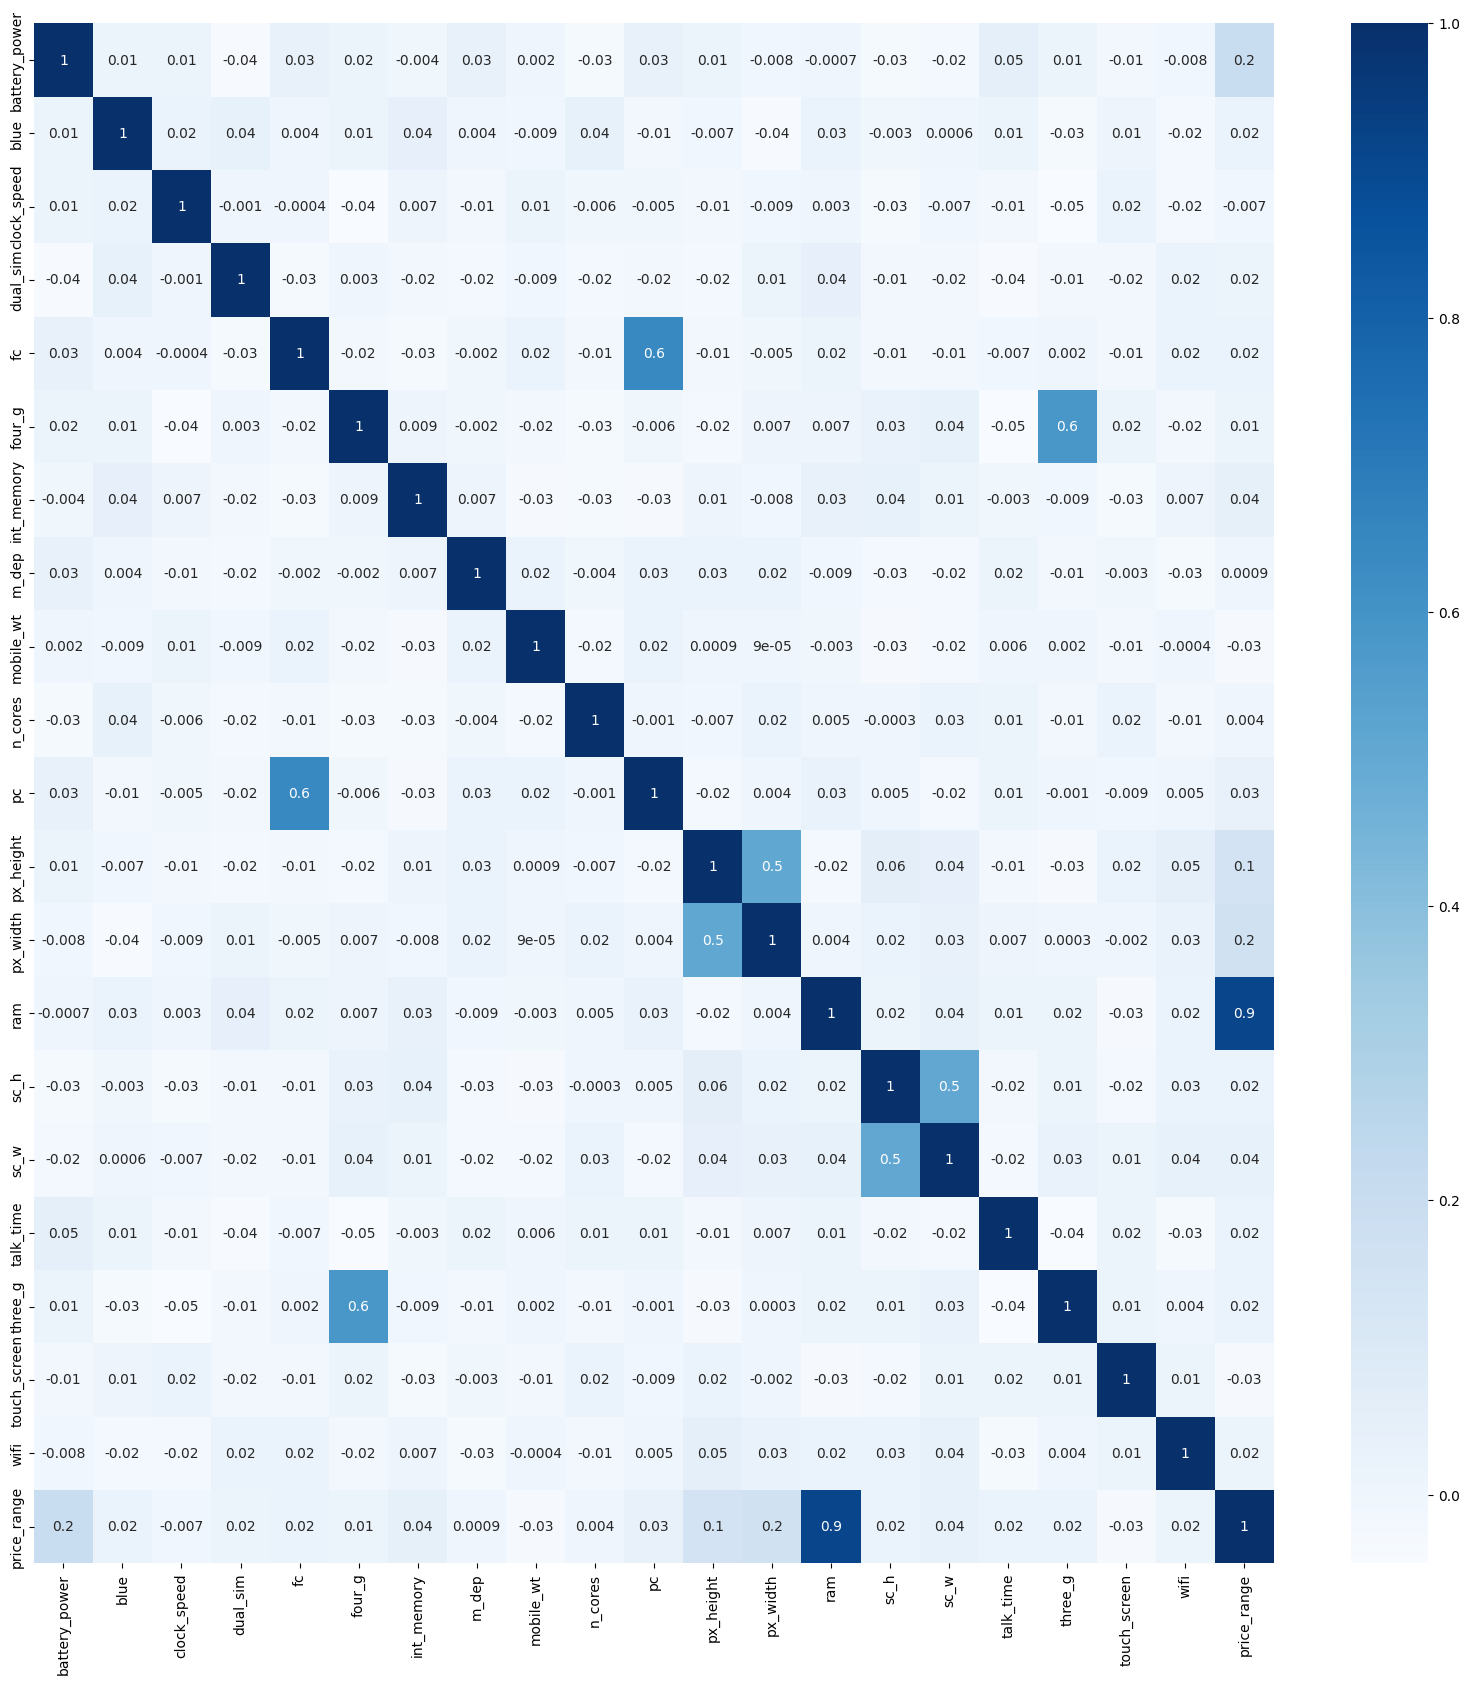

In [5]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".1g")

In [7]:
df.drop(columns=["m_dep", "n_cores"], inplace=True)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
X = df.drop(columns="price_range")
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
y.unique()

array([1, 2, 3, 0], dtype=int64)

In [60]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# model = KNeighborsClassifier(n_neighbors=9)
model = SVC(kernel="linear")
# model = SVC(kernel="poly")

model.fit(X_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       441
           1       0.98      0.98      0.98       451
           2       0.97      0.98      0.98       455
           3       0.99      0.98      0.99       453

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800



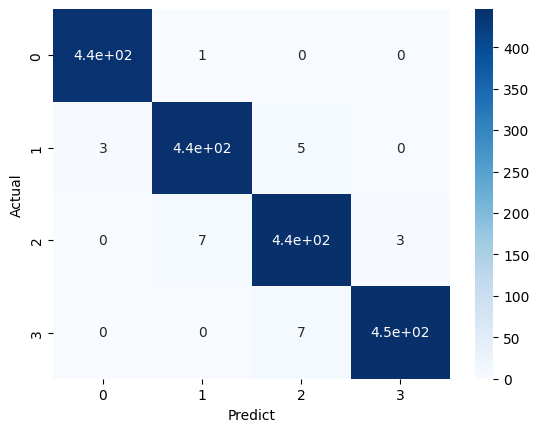

In [61]:
y_train_pred = model.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, cmap="Blues", annot=True, xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
plt.xlabel("Predict")
plt.ylabel("Actual")

print(classification_report(y_train, y_train_pred, target_names=["0", "1", "2", "3"]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.96      1.00      0.98        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



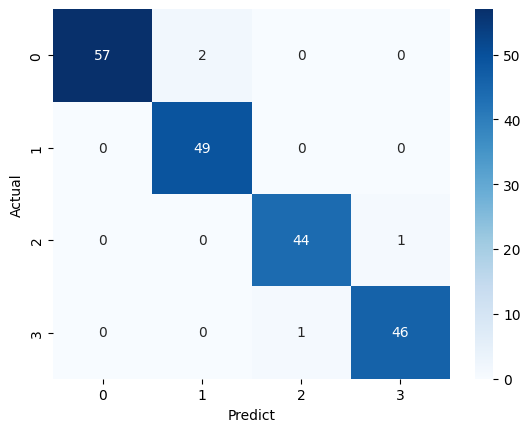

In [62]:
y_test_pred = model.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, cmap="Blues", annot=True, xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
plt.xlabel("Predict")
plt.ylabel("Actual")

print(classification_report(y_test, y_test_pred, target_names=["0", "1", "2", "3"]))